<a href="https://colab.research.google.com/github/AlisonCarv/desafiosJacto/blob/main/desafio1_jacto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

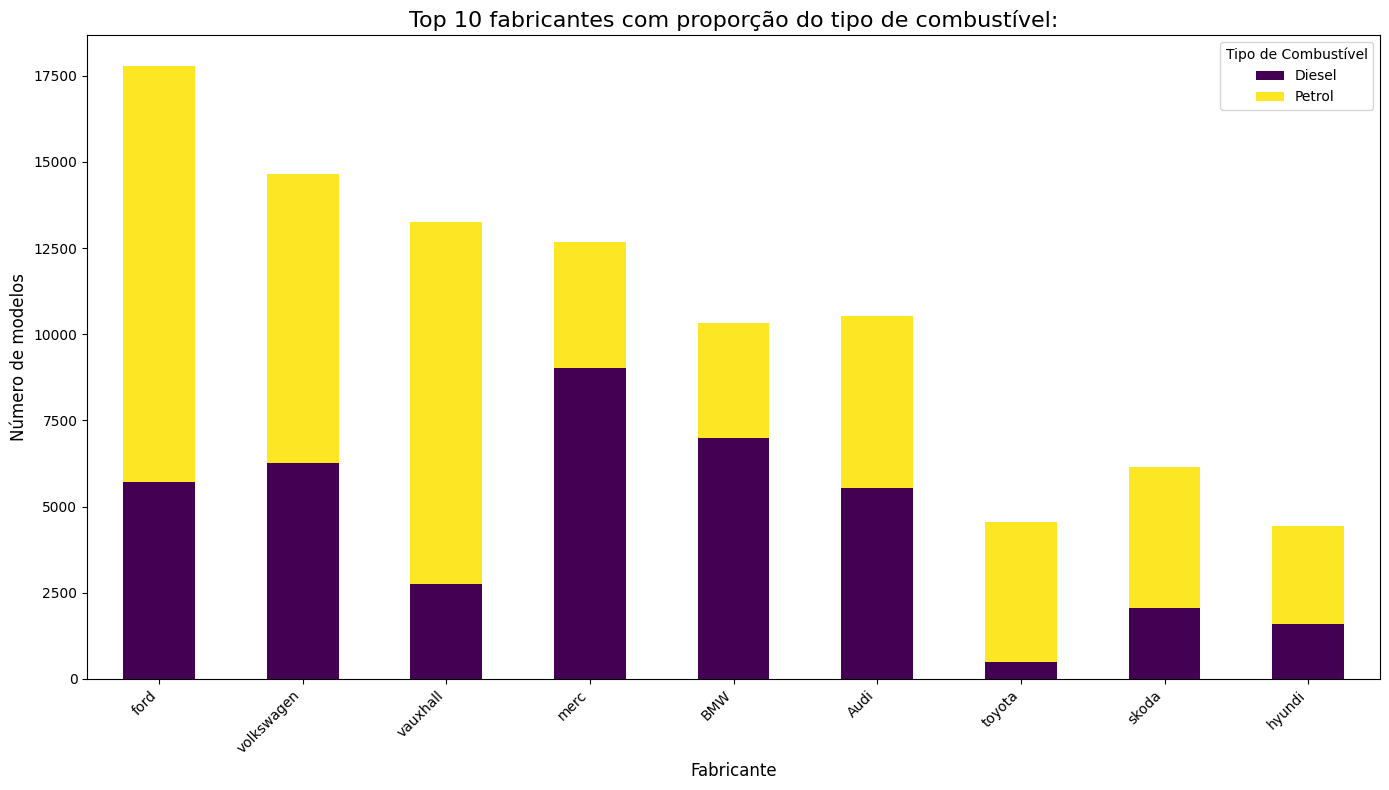

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 clona o repositório para ter acesso ao dataset e define o caminho
!git clone https://github.com/AlisonCarv/desafiosJacto.git
caminho_do_arquivo = "/content/desafiosJacto/cars_data.csv"
df_carros = pd.read_csv(caminho_do_arquivo)

print("Repositório clonado e dataset 'cars_data.csv' carregado com sucesso!")

# 2: obter os fabricantes de maior recorrência
top_10_fabricantes_lista = df_carros['Manufacturer'].value_counts().nlargest(10).index

# 3: filtrar por marcas
df_top10 = df_carros[df_carros['Manufacturer'].isin(top_10_fabricantes_lista)]

# 4: filtrar por tipos de combustível
df_top10 = df_top10.dropna(subset=['fuelType'])
df_top10 = df_top10[df_top10['fuelType'].str.contains('Petrol|Diesel', case=False)]

# 5: cruzar dados filtrados
tabela_cruzada = pd.crosstab(df_top10['Manufacturer'], df_top10['fuelType'])

# 6: ordenar tabela
tabela_cruzada = tabela_cruzada.reindex(top_10_fabricantes_lista)

# 7: plotar o gráfico de barras
tabela_cruzada.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    colormap='viridis'
)

plt.title('Top 10 fabricantes com proporção do tipo de combustível:', fontsize=16)
plt.xlabel('Fabricante', fontsize=12)
plt.ylabel('Número de modelos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Combustível')
plt.tight_layout()
plt.show()